IMPORTING THE LIBRARIES

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

IMPORTING THE DATASET

In [51]:
d = pd.read_csv("/content/drive/MyDrive/archive/tested.csv")

In [ ]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
d.shape

(418, 12)

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


PRE-PROCESSING DATASET

In [ ]:
d.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
d = d.drop(columns='Cabin', axis=1)

In [ ]:
d.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [ ]:
d = d.drop(columns='Fare', axis=1)

In [ ]:
d.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Embarked        0
dtype: int64

In [ ]:
d['Age'].fillna(d['Age'].mean(), inplace=True)

In [ ]:
d.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

In [ ]:
d.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
d.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

DATA VISUALIZATION

In [ ]:
d['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

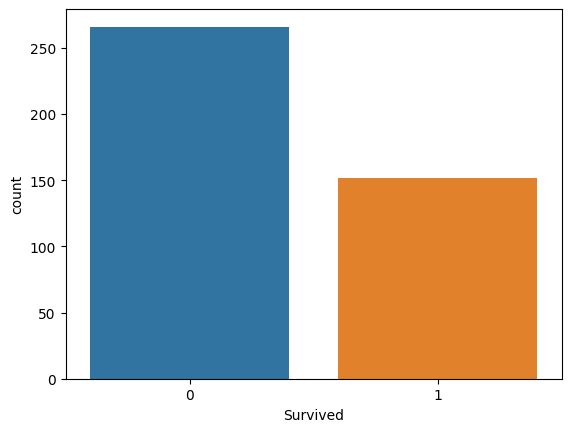

In [ ]:
sns.countplot(x = 'Survived',data = d)

In [ ]:
d['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

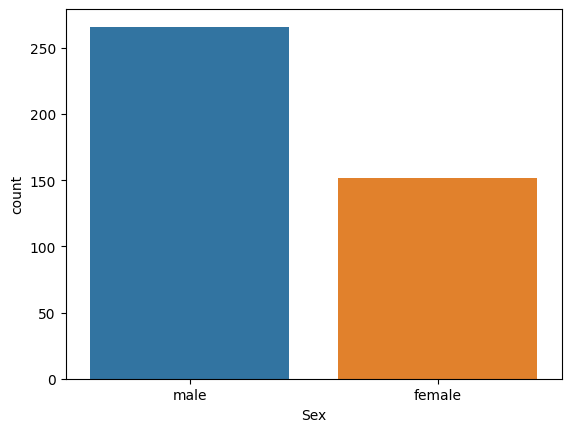

In [ ]:
sns.countplot(x = 'Sex',data = d)

<ipython-input-24-71749e90d525>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(d.corr(),annot=True)


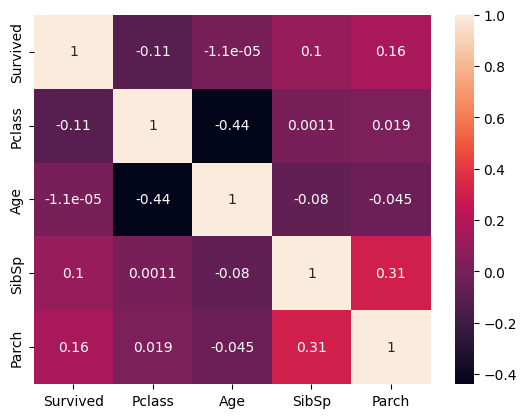

In [ ]:
sns.heatmap(d.corr(),annot=True)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

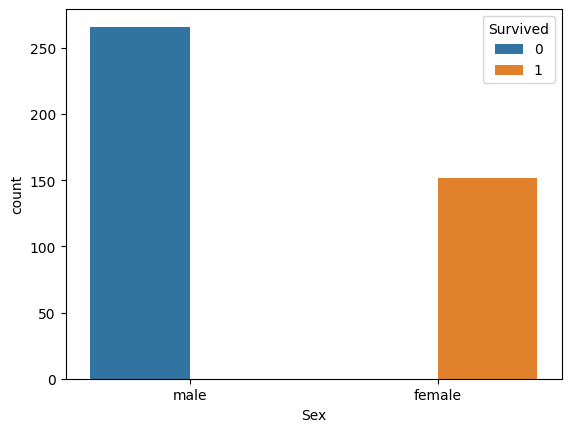

In [ ]:
sns.countplot(x = 'Sex', hue='Survived', data=d)

In [ ]:
d['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

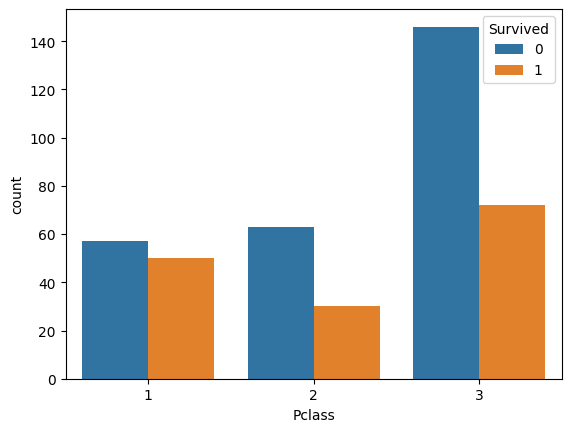

In [ ]:
sns.countplot(x = 'Pclass', hue='Survived', data=d)

TRAIN TEST SPLIT

In [ ]:
y_data = d.Survived

In [ ]:
x_data = d.drop(['Survived'], axis = 1)

In [ ]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [ ]:
x_data.Age = x_data.Age.replace({'Child': 0,'Young Adult':1, 'Middle-Aged': 2, 'Senior': 3})

In [ ]:
x_data.Embarked = x_data.Embarked.replace({'C': 0, 'Q': 1, 'S':2})

In [ ]:
x_data.Sex = x_data.Sex.replace({'female': 0, 'male': 1})

In [ ]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,1
1,3,0,47.0,1,0,2
2,2,1,62.0,0,0,1
3,3,1,27.0,0,0,2
4,3,0,22.0,1,1,2


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=42)

BUILDING THE MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier()

PREDICTING THE MODEL

In [ ]:
y_pred = model.predict(x_test)
print("Accuracy score :",accuracy_score(y_test, y_pred))

Accuracy score : 0.75


In [ ]:
x_train_prediction = model.predict(x_train)

In [ ]:
print(x_train_prediction)

[0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1
 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1
 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0]


EVALUATING THE MODEL

In [ ]:
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

In [ ]:
print("Accuracy score of training data: ",training_data_accuracy)

Accuracy score of training data:  0.884


In [ ]:
x_test_prediction = model.predict(x_test)

In [ ]:
print(x_test_prediction)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1]


In [ ]:
test_data_accuracy = accuracy_score(y_test, x_test_prediction)

In [ ]:
print("Accuracy score of test data: ",test_data_accuracy)

Accuracy score of test data:  0.75


CONFUSION MATRIX HEATMAP

In [ ]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix

array([[94, 13],
       [29, 32]])

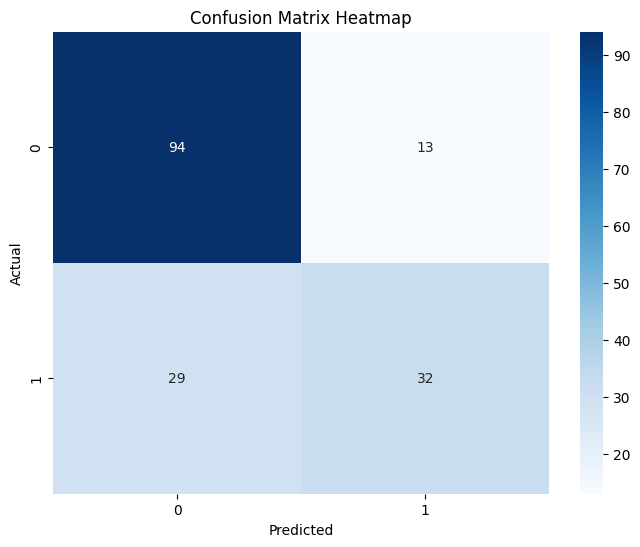

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()